# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.
* The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
* The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
gas_t=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 16 neural netwk/gas_turbines.csv')
gas_t

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [3]:
# changing position of target "TEY"
target=gas_t['TEY']
#drop exiting columns of target
gas_t.drop(labels=['TEY'],axis=1,inplace=True)
gas_t.insert(0,'Y',target)
gas_t=gas_t.rename({'Y':'TEY'},axis=1)
gas_t

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [5]:
gas_t.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [6]:
gas_t.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


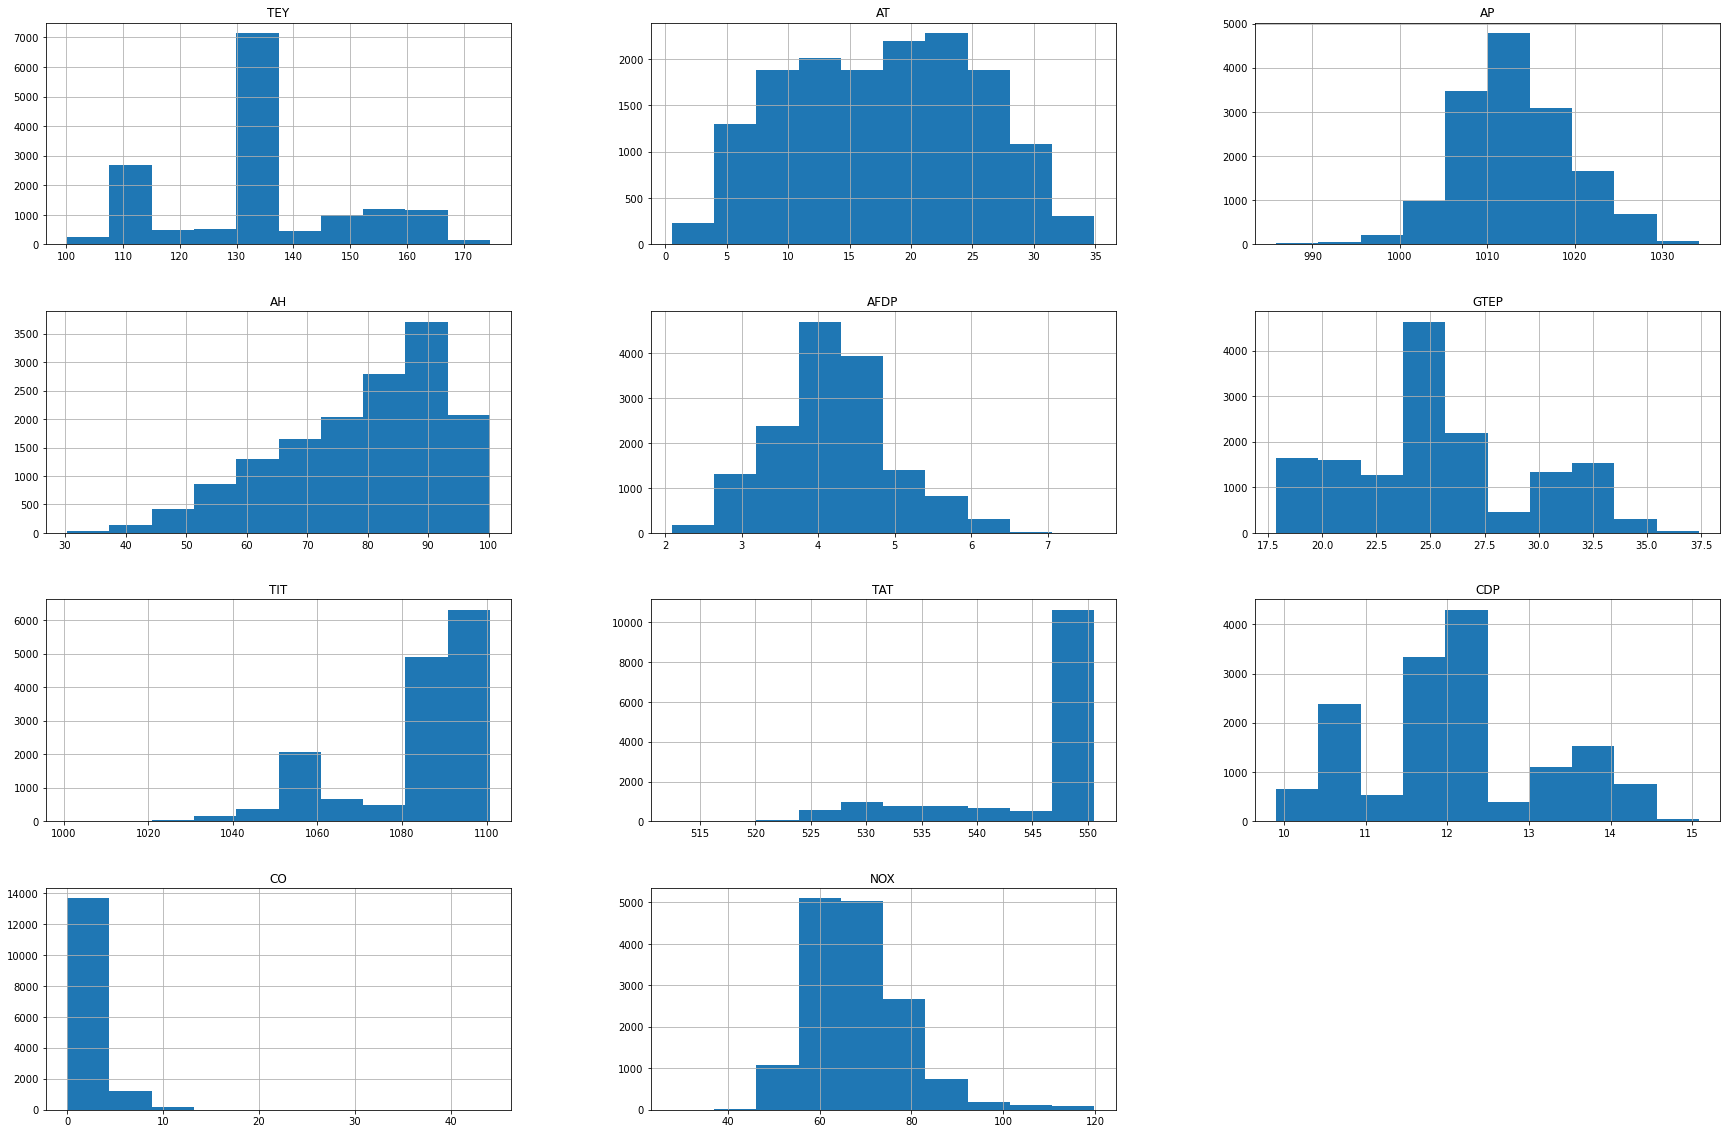

In [16]:
gas_t.hist(figsize=(30,20))
plt.show()

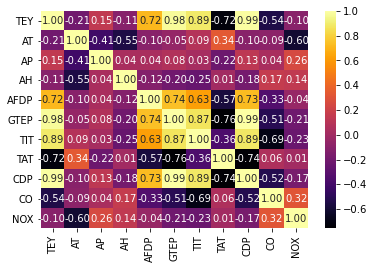

In [7]:
sns.heatmap(gas_t.corr(),annot=True,cmap='inferno',fmt='.2f')
ax=plt.gca()


<Figure size 720x720 with 0 Axes>

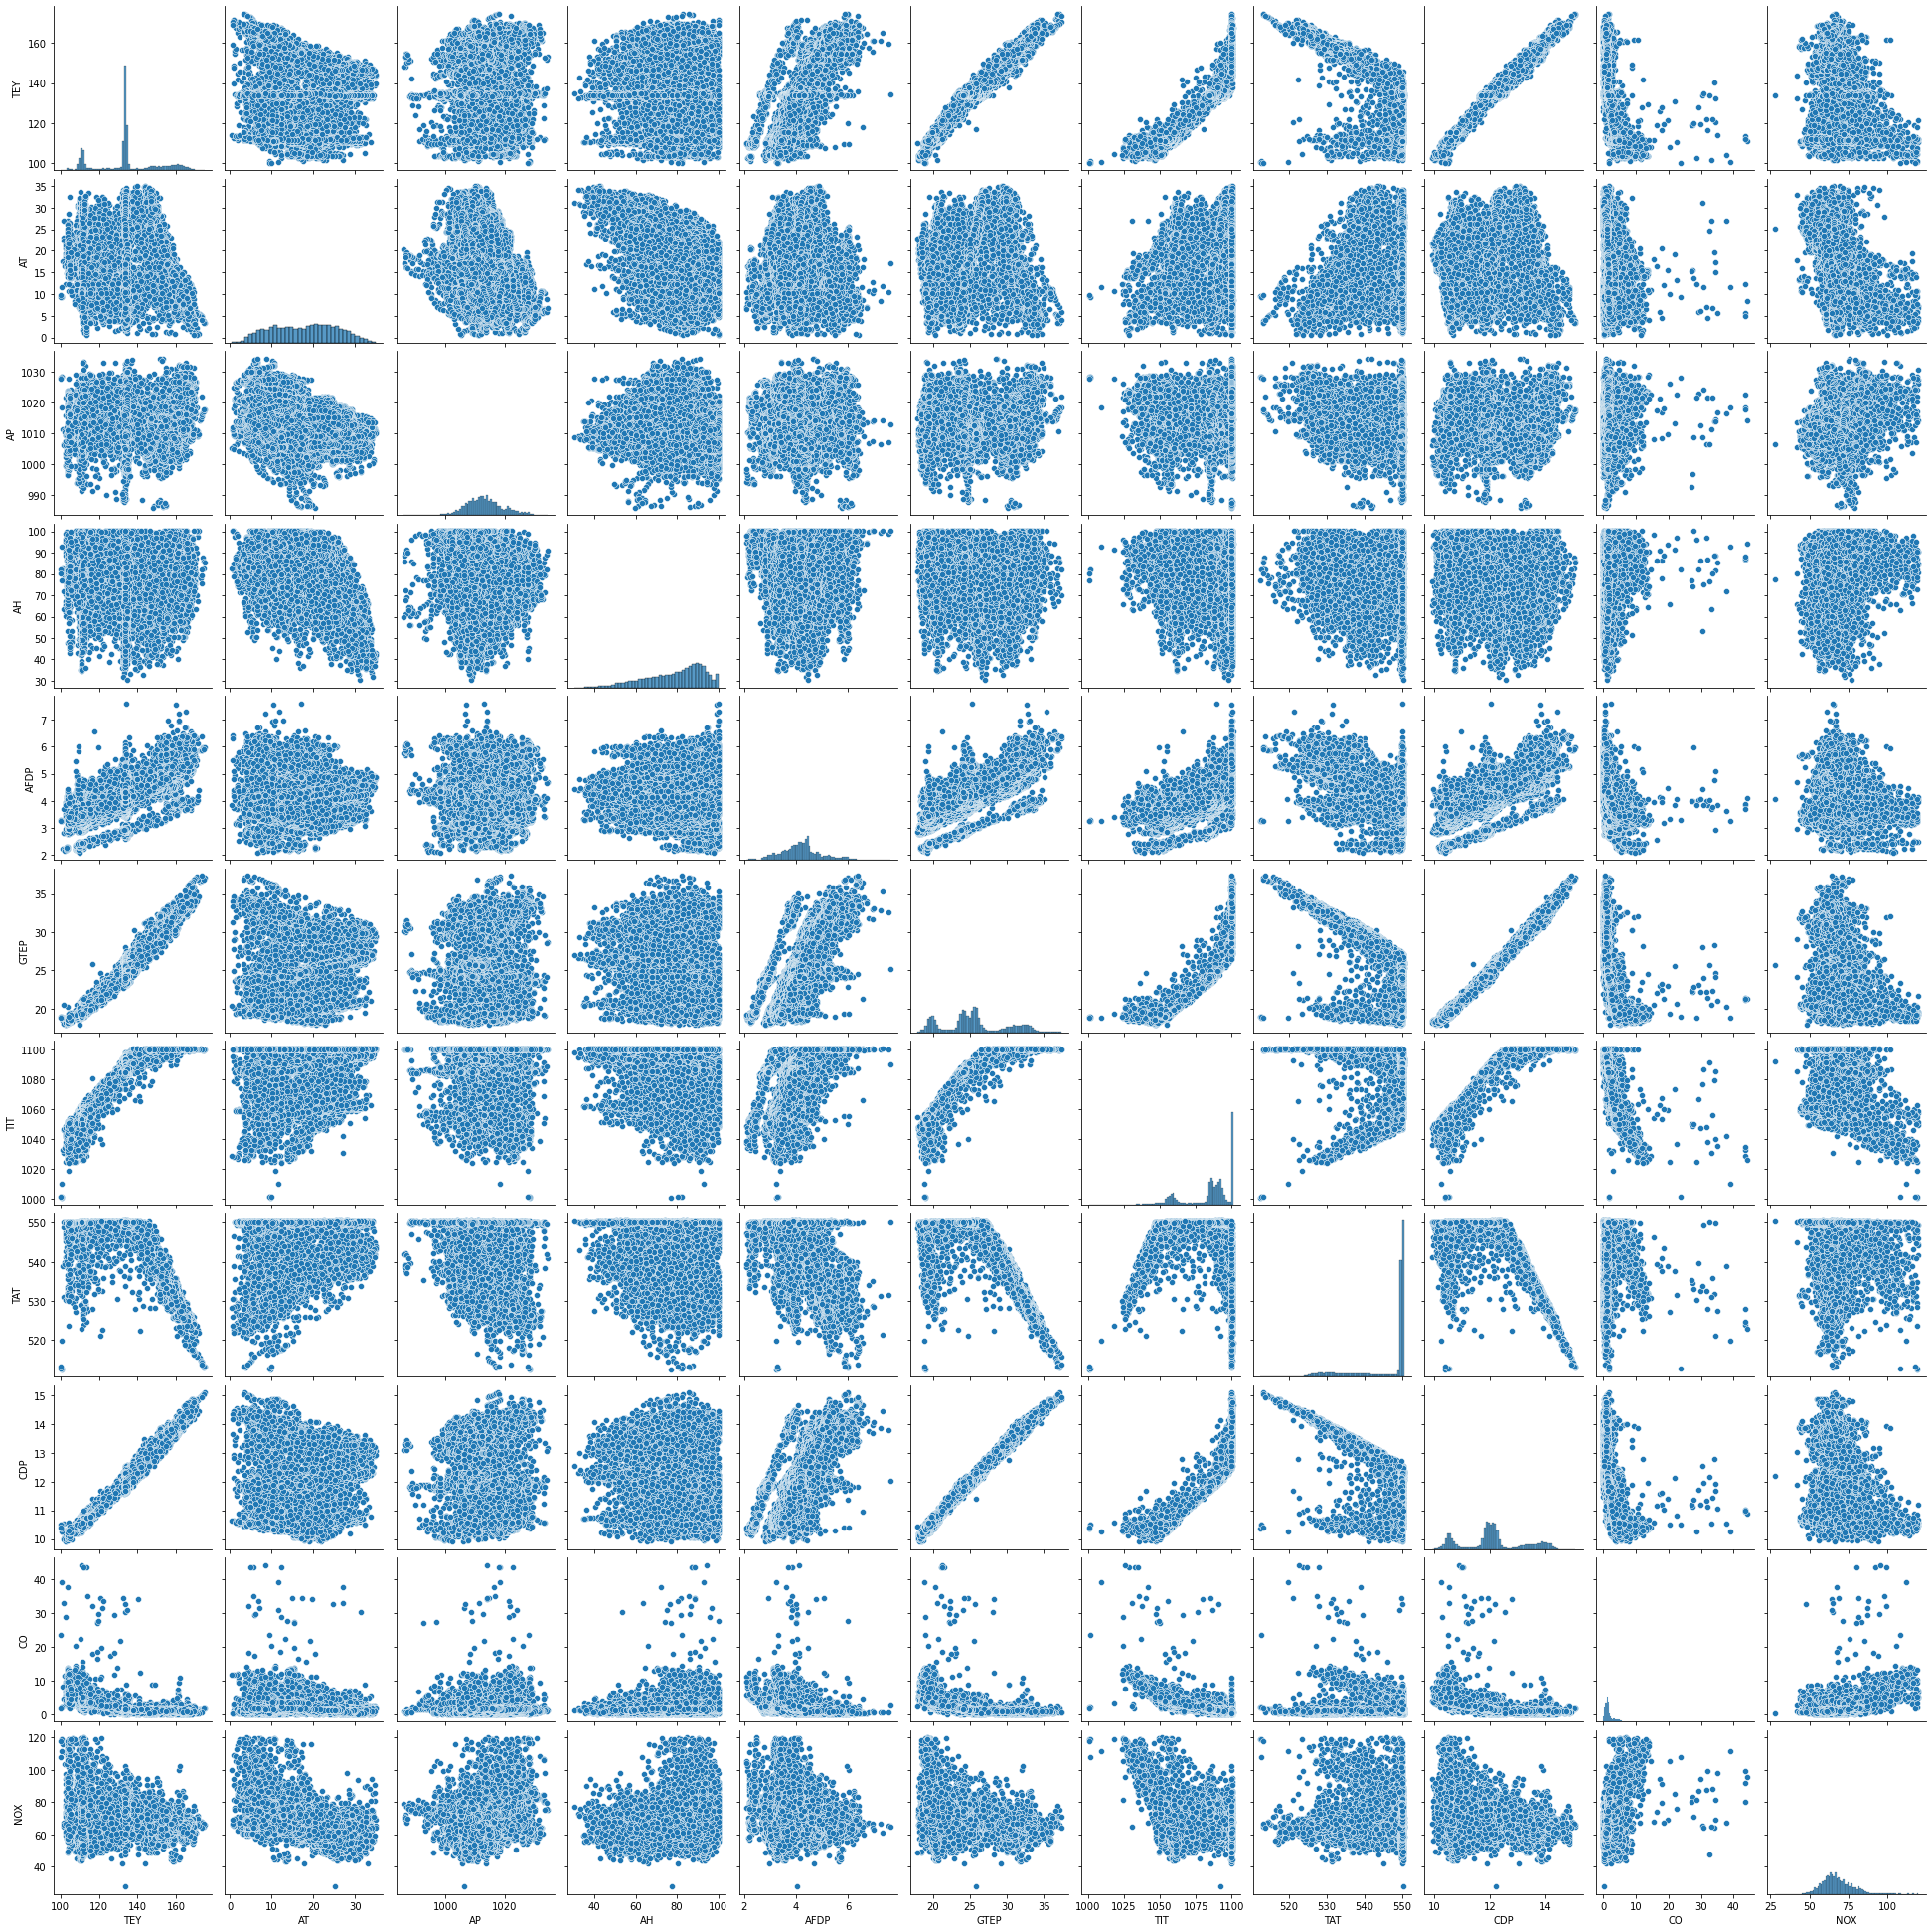

In [8]:
plt.figure(figsize=(10,10))
sns.pairplot(gas_t,palette='Dark2')

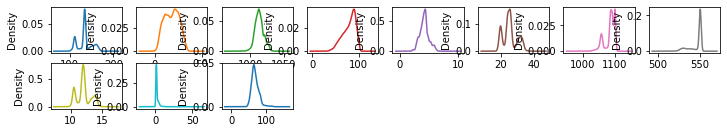

In [18]:
gas_t.plot(kind='density',subplots=True,figsize=(12,8),layout=(8,8),sharex=False,legend=False)
plt.show()

<AxesSubplot:xlabel='TEY', ylabel='AP'>

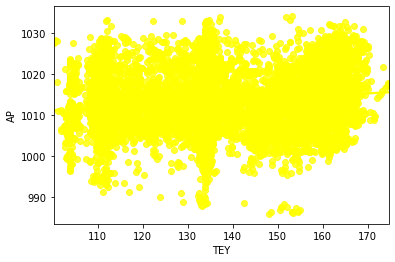

In [9]:
sns.regplot(x='TEY',y='AP',data=gas_t,color='yellow')

<AxesSubplot:xlabel='TEY', ylabel='AT'>

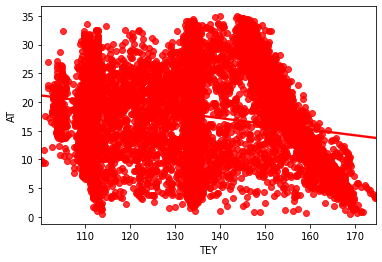

In [10]:
sns.regplot(x='TEY',y='AT',data=gas_t,color='red')

<AxesSubplot:xlabel='TEY', ylabel='AH'>

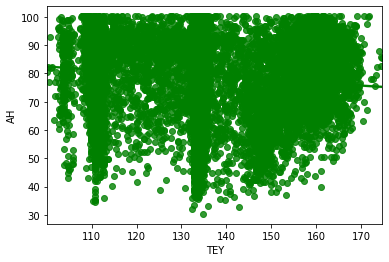

In [11]:
sns.regplot(x='TEY',y='AH',data=gas_t,color='green')

<AxesSubplot:xlabel='TEY', ylabel='AFDP'>

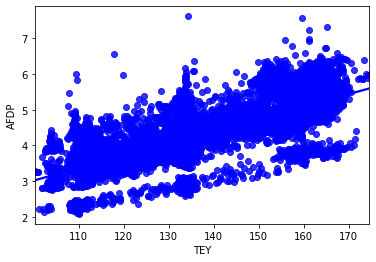

In [12]:
sns.regplot(x='TEY',y='AFDP',data=gas_t,color='blue')

<AxesSubplot:xlabel='TEY', ylabel='GTEP'>

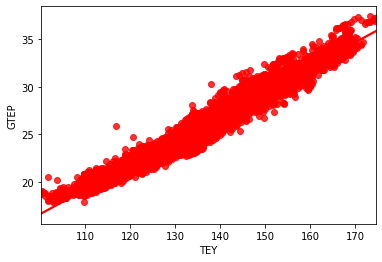

In [13]:
sns.regplot(x='TEY',y='GTEP',data=gas_t,color='red')

<AxesSubplot:xlabel='TEY', ylabel='TIT'>

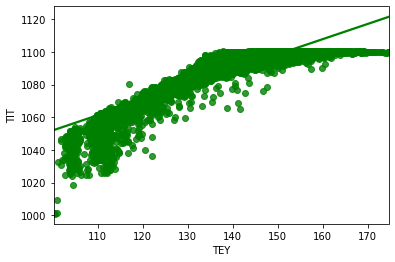

In [14]:
sns.regplot(x='TEY',y='TIT',data=gas_t,color='green')

<AxesSubplot:xlabel='TEY', ylabel='TAT'>

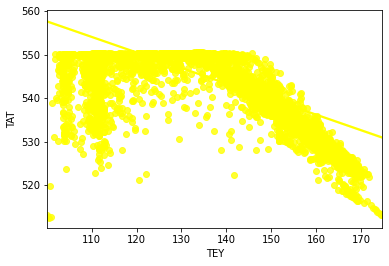

In [15]:
sns.regplot(x='TEY',y='TAT',data=gas_t,color='yellow')

<AxesSubplot:xlabel='TEY', ylabel='CDP'>

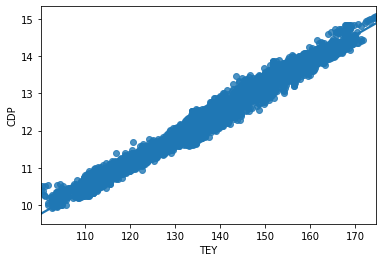

In [16]:
sns.regplot(x='TEY',y='CDP',data=gas_t,)

<AxesSubplot:xlabel='TEY', ylabel='CO'>

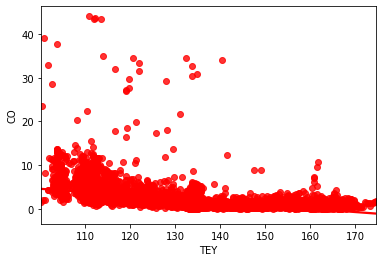

In [17]:
sns.regplot(x='TEY',y='CO',data=gas_t,color='red')

<AxesSubplot:xlabel='TEY', ylabel='NOX'>

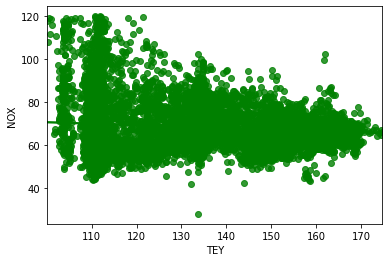

In [18]:
sns.regplot(x='TEY',y='NOX',data=gas_t,color='green')

## Tuning of Hyperparameter


In [4]:
array=gas_t.values
x=gas_t[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
y=gas_t['TEY']

In [5]:
array

array([[ 114.7   ,    6.8594, 1007.9   , ...,   10.605 ,    3.1547,
          82.722 ],
       [ 114.72  ,    6.785 , 1008.4   , ...,   10.598 ,    3.2363,
          82.776 ],
       [ 114.71  ,    6.8977, 1008.8   , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [ 110.19  ,    7.2647, 1006.3   , ...,   10.483 ,    7.9632,
          90.912 ],
       [ 110.74  ,    7.006 , 1006.8   , ...,   10.533 ,    6.2494,
          93.227 ],
       [ 111.58  ,    6.9279, 1007.2   , ...,   10.583 ,    4.9816,
          92.498 ]])

In [6]:
# Dataset contains too many records, it will take much time to get the results. So we will use only first 500 records
X=x.iloc[0:1000,:]
Y=y.iloc[0:1000]

In [7]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
995,5.2695,1020.4,86.020,3.9472,20.139,1032.5,531.21,10.631,10.1960,98.477
996,6.4850,1020.0,80.734,4.0766,21.212,1051.3,539.21,11.051,6.5858,92.288
997,7.0672,1018.3,77.202,4.4756,24.036,1085.0,549.65,11.790,1.6896,83.398
998,7.9300,1018.3,73.667,4.5148,24.203,1085.4,549.77,11.794,1.4463,83.550


In [8]:
Y

0      114.70
1      114.72
2      114.71
3      114.72
4      114.72
        ...  
995    111.74
996    118.98
997    134.69
998    134.69
999    134.69
Name: TEY, Length: 1000, dtype: float64

In [9]:
a=StandardScaler()
a.fit(X)
X_standardized=a.transform(X)

In [10]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.574574e-16,-8.661682e-15,-8.490986e-16,-5.345724e-16,-6.250556e-16,-1.127622e-14,2.830847e-15,5.973000e-17,-1.905420e-17,-3.077538e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.251954e+00,-3.181315e+00,-3.203771e+00,-1.852366e+00,-1.730647e+00,-3.518695e+00,-2.295117e+00,-1.864666e+00,-5.185352e-01,-2.260835e+00
25%,-7.295010e-01,-5.768992e-01,-6.253568e-01,-9.093164e-01,-7.877005e-01,-1.574853e-01,-9.394526e-01,-7.210518e-01,-3.864336e-01,-7.547486e-01
50%,-6.672805e-02,7.829978e-02,1.954245e-01,-1.893837e-01,-4.899508e-01,7.116847e-02,-7.952501e-02,-4.750168e-01,-2.049098e-01,-4.004075e-02
75%,6.783417e-01,7.802986e-01,7.009769e-01,1.001044e+00,1.026747e+00,7.342643e-01,1.057579e+00,1.018739e+00,-9.613934e-02,4.598528e-01
max,3.427717e+00,1.961997e+00,1.655951e+00,2.154264e+00,1.835762e+00,7.799950e-01,1.095520e+00,1.819231e+00,1.048242e+01,3.682261e+00


### Batch size and Epochs

In [10]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam


In [29]:
#  In the Input_dim - the value that you are taking must match with no. of inputs you havein dataset, when you are building model. 
# defining the model
def create_model():
    model=Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [30]:

# Create the model
model=KerasClassifier(build_fn=create_model,verbose=0)
# Define the grid search parameters
batch_size=[10,20,40]
epochs=[10,50,100]
# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.9s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   3.1s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   3.2s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   3.1s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   3.1s


In [ ]:
# Summarize the results
print('Best :{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with :{}'.format(mean,stdev,param))

## Learning rate and Drop out rate

In [30]:

# defining the model
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim =10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END ......dropout_rate=0.0, learnin

In [31]:
# Summarize the results
print('Best : {},using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with :{}'.format(mean,stdev,param))

Best : 0.009999999776482582,using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.0, 'learning_rate': 0.1}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.1, 'learning_rate': 0.001}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.1, 'learning_rate': 0.1}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.2, 'learning_rate': 0.001}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.009999999776482582,0.015491933038557972 with :{'dropout_rate': 0.2, 'learning_rate': 0.1}


## Activation Function and Kernel Initializer

In [32]:
# definig the model
def create_model(activation_function,init):
    model=Sequential()
    model.add(Dense(8,input_dim=10,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim=10,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    adam=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [33]:
# create model
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=10)
 # Define the grid search parameters
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
# Make a dictionary of the grid search parameters
param_grids=dict(activation_function=activation_function,init=init)
# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.4s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   0.4s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   0.4s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   0.4s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   0.5s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................
[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   0.4s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................
[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................
[CV 2/5; 12/12] END ...activ

## Number of Neurons in activation layer

In [34]:
# defining the model
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=10,kernel_initializer='uniform',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='uniform',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    adam=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [35]:
#create model
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=10)

# Define the grid search parameters

neuron1=[4,8,16]
neuron2=[2,4,8]
# Make a dictionary of the grid search parameters

param_grids=dict(neuron1=neuron1,neuron2=neuron2)

# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

In [36]:
# Summarize the results
print('Best : {},using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with :{}'.format(mean,stdev,param))

Best : 0.0019999999552965165,using {'neuron1': 4, 'neuron2': 2}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 4, 'neuron2': 2}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 4, 'neuron2': 4}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 4, 'neuron2': 8}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 8, 'neuron2': 2}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 8, 'neuron2': 4}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 8, 'neuron2': 8}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 16, 'neuron2': 2}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 16, 'neuron2': 4}
0.0019999999552965165,0.003999999910593032 with :{'neuron1': 16, 'neuron2': 8}


## Training model with optimum values of Hyperparameters

In [11]:
from sklearn.metrics import classification_report,accuracy_score
 # defining the model
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=10,kernel_initializer='uniform',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [12]:
#create model
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=100,epochs=50)

# fitting the model
model.fit(X_standardized,Y)

# prdicting using trained model
y_predict=model.predict(X_standardized)



In [15]:
y_predict

array([[110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.69],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.69],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71],
       [110.71

In [13]:
# printing metrics
# the Y and Y_predict are continuous data types thats why im adding .round()
print(accuracy_score(Y.round(),y_predict.round()))

0.018


# Back propogation

In [34]:
# create model
model=Sequential()
model.add(Dense(12, input_dim=10,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
# fit model
history=model.fit(X,Y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
34/34 [==============================] - 1s 13ms/step - loss: -28948.0605 - accuracy: 0.0000e+00 - val_loss: -44747.9414 - val_accuracy: 0.0000e+00
Epoch 2/150
34/34 [==============================] - 0s 5ms/step - loss: -55812.5508 - accuracy: 0.0000e+00 - val_loss: -76762.5078 - val_accuracy: 0.0000e+00
Epoch 3/150
34/34 [==============================] - 0s 5ms/step - loss: -94133.9375 - accuracy: 0.0000e+00 - val_loss: -127413.7109 - val_accuracy: 0.0000e+00
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: -153241.4844 - accuracy: 0.0000e+00 - val_loss: -203508.6719 - val_accuracy: 0.0000e+00
Epoch 5/150
34/34 [==============================] - 0s 5ms/step - loss: -239885.1250 - accuracy: 0.0000e+00 - val_loss: -312400.5625 - val_accuracy: 0.0000e+00
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: -361344.9062 - accuracy: 0.0000e+00 - val_loss: -462124.8125 - val_accuracy: 0.0000e+00
Epoch 7/150
34/34 [===================

Epoch 51/150
34/34 [==============================] - 0s 5ms/step - loss: -135456496.0000 - accuracy: 0.0000e+00 - val_loss: -146264032.0000 - val_accuracy: 0.0000e+00
Epoch 52/150
34/34 [==============================] - 0s 5ms/step - loss: -142723568.0000 - accuracy: 0.0000e+00 - val_loss: -154036208.0000 - val_accuracy: 0.0000e+00
Epoch 53/150
34/34 [==============================] - 0s 5ms/step - loss: -150223728.0000 - accuracy: 0.0000e+00 - val_loss: -162035280.0000 - val_accuracy: 0.0000e+00
Epoch 54/150
34/34 [==============================] - 0s 5ms/step - loss: -157944400.0000 - accuracy: 0.0000e+00 - val_loss: -170277184.0000 - val_accuracy: 0.0000e+00
Epoch 55/150
34/34 [==============================] - 0s 5ms/step - loss: -165906352.0000 - accuracy: 0.0000e+00 - val_loss: -178732976.0000 - val_accuracy: 0.0000e+00
Epoch 56/150
34/34 [==============================] - 0s 5ms/step - loss: -174082608.0000 - accuracy: 0.0000e+00 - val_loss: -187454096.0000 - val_accuracy: 0.0

Epoch 100/150
34/34 [==============================] - 0s 4ms/step - loss: -780382848.0000 - accuracy: 0.0000e+00 - val_loss: -830658240.0000 - val_accuracy: 0.0000e+00
Epoch 101/150
34/34 [==============================] - 0s 5ms/step - loss: -800171584.0000 - accuracy: 0.0000e+00 - val_loss: -851530560.0000 - val_accuracy: 0.0000e+00
Epoch 102/150
34/34 [==============================] - 0s 5ms/step - loss: -820205696.0000 - accuracy: 0.0000e+00 - val_loss: -872755520.0000 - val_accuracy: 0.0000e+00
Epoch 103/150
34/34 [==============================] - 0s 5ms/step - loss: -840547648.0000 - accuracy: 0.0000e+00 - val_loss: -894302784.0000 - val_accuracy: 0.0000e+00
Epoch 104/150
34/34 [==============================] - 0s 5ms/step - loss: -861148352.0000 - accuracy: 0.0000e+00 - val_loss: -916134464.0000 - val_accuracy: 0.0000e+00
Epoch 105/150
34/34 [==============================] - 0s 5ms/step - loss: -882053056.0000 - accuracy: 0.0000e+00 - val_loss: -938176832.0000 - val_accurac

34/34 [==============================] - 0s 4ms/step - loss: -2062073984.0000 - accuracy: 0.0000e+00 - val_loss: -2184924160.0000 - val_accuracy: 0.0000e+00
Epoch 149/150
34/34 [==============================] - 0s 5ms/step - loss: -2096358656.0000 - accuracy: 0.0000e+00 - val_loss: -2221236992.0000 - val_accuracy: 0.0000e+00
Epoch 150/150
34/34 [==============================] - 0s 5ms/step - loss: -2131024640.0000 - accuracy: 0.0000e+00 - val_loss: -2257772032.0000 - val_accuracy: 0.0000e+00


In [37]:
# evaluate the model
scores=model.evaluate(X,Y)
print('%s:%.2f%%'%(model.metrics_names[1],scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: -2185287168.0000 - accuracy: 0.0000e+00
accuracy:0.00%


In [38]:
model.history.history.keys()

dict_keys([])

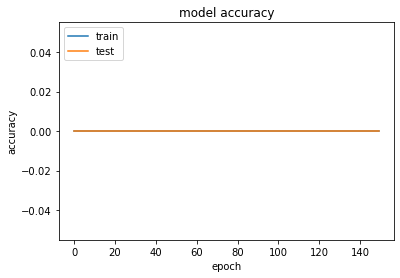

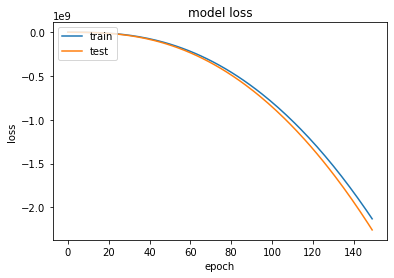

In [39]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()